In [1]:
library(tidyverse)
library(tidytuesdayR)
library(lubridate)

-- Attaching packages --------------------------------------- tidyverse 1.3.1 --

v ggplot2 3.3.5     v purrr   0.3.4
v tibble  3.1.6     v dplyr   1.0.7
v tidyr   1.1.4     v stringr 1.4.0
v readr   2.1.2     v forcats 0.5.1

-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()


Attaching package: 'lubridate'


The following objects are masked from 'package:base':

    date, intersect, setdiff, union




In [2]:
hotels <- readr::read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-02-11/hotels.csv')

country_codes <- read_csv("country_codes.csv")

Rows: 119390 Columns: 32

-- Column specification --------------------------------------------------------
Delimiter: ","
chr  (13): hotel, arrival_date_month, meal, country, market_segment, distrib...
dbl  (18): is_canceled, lead_time, arrival_date_year, arrival_date_week_numb...
date  (1): reservation_status_date


i Use `spec()` to retrieve the full column specification for this data.
i Specify the column types or set `show_col_types = FALSE` to quiet this message.

Rows: 243 Columns: 2

-- Column specification --------------------------------------------------------
Delimiter: ","
chr (2): country, country_name


i Use `spec()` to retrieve the full column specification for this data.
i Specify the column types or set `show_col_types = FALSE` to quiet this message.



In [3]:
# creating a new date column with the year/month/day of month cols for arrivals
hotels <- hotels %>% 
  mutate(arrival_date = dmy(paste(arrival_date_day_of_month,
                                  arrival_date_month,
                                  arrival_date_year,
                                  sep = "-"))) %>% 
  mutate(is_canceled = as.factor(is_canceled),
         stays_in_weekend_nights = as.factor(stays_in_weekend_nights),
         stays_in_week_nights = as.factor(stays_in_week_nights),
         meal = as.factor(meal),
         market_segment = as.factor(market_segment),
         distribution_channel = as.factor(distribution_channel),
         reserved_room_type = as.factor(reserved_room_type),
         assigned_room_type = as.factor(assigned_room_type),
         deposit_type = as.factor(deposit_type),
         customer_type = as.factor(customer_type),
         reservation_status = as.factor(reservation_status))

`summarise()` has grouped output by 'hotel'. You can override using the `.groups` argument.



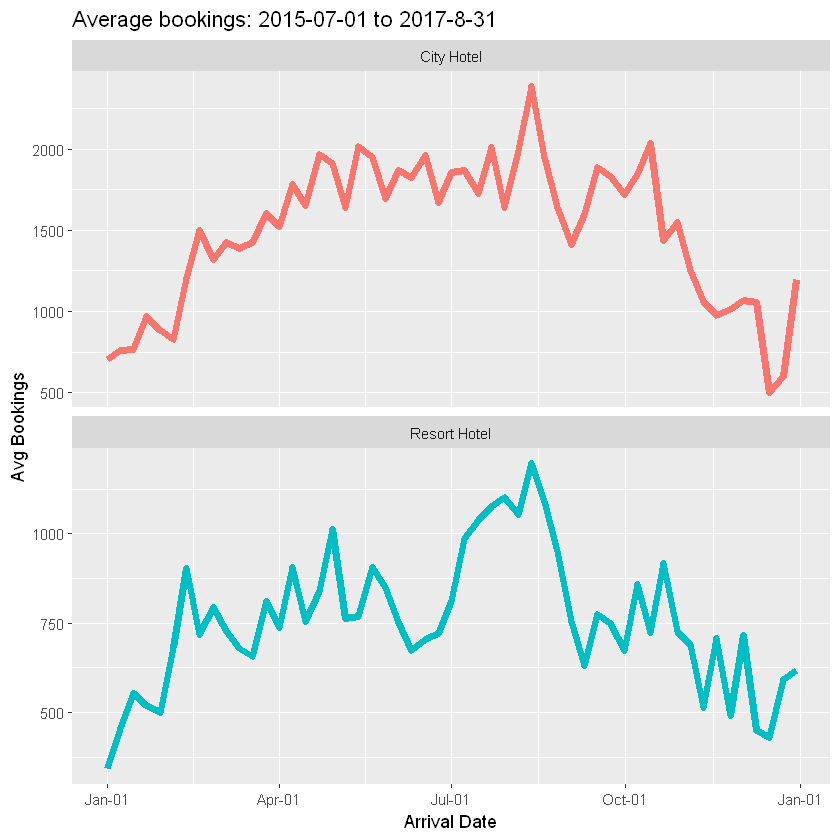

In [4]:
hotels %>% 
  group_by(hotel, arrival_date_week_number) %>%
  summarise(avg_bookings = mean(n())) %>%
  mutate(year_month = ymd("2000-01-01") + weeks(arrival_date_week_number - 1)) %>% 
  ggplot(aes(year_month, avg_bookings)) +
  geom_line(aes(color = hotel), size = 2) +
  scale_x_date(date_labels = "%b-%d") +
  facet_wrap(~ hotel, ncol = 1, scales = "free_y") +
  theme(legend.position = "none") +
  labs(x = "Arrival Date", y = "Avg Bookings",
       title = "Average bookings: 2015-07-01 to 2017-8-31")